In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aggregated-week-max/aggregated_week_max.csv


In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
# importing the DataFrame
df = pd.read_csv('/kaggle/input/aggregated-week-max/aggregated_week_max.csv')
df.head()

,Date Time,Tpot (K),rh (%),H2OC (mmol/mol),SWDR (W/m²),PAR (µmol/m²/s)
0,2004-01-04,289.22,97.5,8.98,742.66,1471.04
1,2004-01-11,299.10,99.0,18.91,838.63,1691.12
2,2004-01-18,285.21,97.7,9.31,280.89,534.56
3,2004-01-25,278.27,98.6,6.55,401.61,764.09
4,2004-02-01,283.74,97.3,8.48,449.90,878.96


In [4]:
# Renaming the columns for prophet compatibility
df.rename(columns={'Date Time':'ds', 'Tpot (K)':'y', 'rh (%)':'rh', 'H2OC (mmol/mol)':'H2OC', 'SWDR (W/m²)':'SWDR', 'PAR (µmol/m²/s)':'PAR'}, inplace=True)
df.head()

,ds,y,rh,H2OC,SWDR,PAR
0,2004-01-04,289.22,97.5,8.98,742.66,1471.04
1,2004-01-11,299.10,99.0,18.91,838.63,1691.12
2,2004-01-18,285.21,97.7,9.31,280.89,534.56
3,2004-01-25,278.27,98.6,6.55,401.61,764.09
4,2004-02-01,283.74,97.3,8.48,449.90,878.96


In [5]:
# Splitting the data
train = df.iloc[:828]
test = df.iloc[828:]
print(len(train))
print(len(test))

828
60


# Univariate Time Series Forecasting

In [6]:
# Univariate Time Series Forecasting
prophet_basic = Prophet()
prophet_basic.fit(train)

06:07:48 - cmdstanpy - INFO - Chain [1] start processing
06:07:48 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Making future dataframe for 60 periods (weeks)
future = prophet_basic.make_future_dataframe(periods=60, freq='W')
forecast = prophet_basic.predict(future)

In [8]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
883 2020-12-06  290.912759  283.080364  298.941035
884 2020-12-13  290.454969  282.212131  298.973076
885 2020-12-20  290.582634  282.258367  298.554277
886 2020-12-27  291.298680  283.444608  298.851942
887 2021-01-03  292.022113  284.072575  299.888468


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
883,2020-12-06,297.569737,283.080364,298.941035,297.556103,297.582288,-6.656978,-6.656978,-6.656978,-6.656978,-6.656978,-6.656978,0.0,0.0,0.0,290.912759
884,2020-12-13,297.575812,282.212131,298.973076,297.561923,297.588747,-7.120842,-7.120842,-7.120842,-7.120842,-7.120842,-7.120842,0.0,0.0,0.0,290.454969
885,2020-12-20,297.581886,282.258367,298.554277,297.567462,297.595104,-6.999252,-6.999252,-6.999252,-6.999252,-6.999252,-6.999252,0.0,0.0,0.0,290.582634
886,2020-12-27,297.587961,283.444608,298.851942,297.573068,297.601653,-6.289281,-6.289281,-6.289281,-6.289281,-6.289281,-6.289281,0.0,0.0,0.0,291.298680
887,2021-01-03,297.594036,284.072575,299.888468,297.578916,297.608164,-5.571923,-5.571923,-5.571923,-5.571923,-5.571923,-5.571923,0.0,0.0,0.0,292.022113


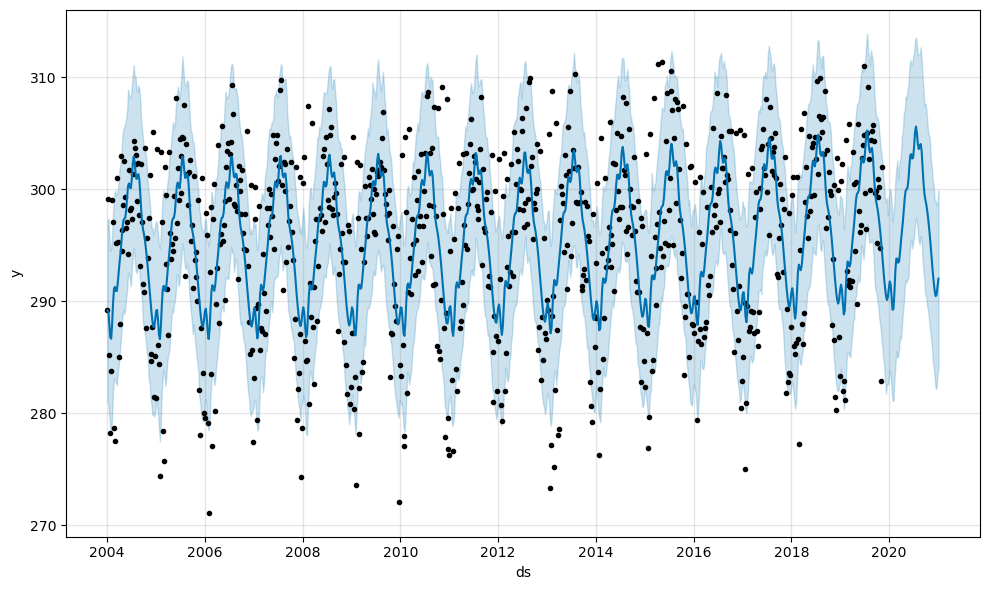

In [10]:
# Plot the forecast
fig1 = prophet_basic.plot(forecast)

In [11]:
# Creating DFs for plotting
train_plot = train.copy(deep=True)
train_plot['ds'] = pd.to_datetime(train_plot['ds'])
train_plot = train_plot.set_index("ds")

test_plot = test.copy(deep=True)
test_plot['ds'] = pd.to_datetime(test_plot['ds'])
test_plot = test_plot.set_index("ds")

plot_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)
plot_forecast['ds'] = pd.to_datetime(plot_forecast['ds'])
plot_forecast = plot_forecast.set_index("ds")

display(train_plot.head())
display(test_plot.head())
display(plot_forecast.head())

,y,rh,H2OC,SWDR,PAR
ds,,,,,
2004-01-04,289.22,97.5,8.98,742.66,1471.04
2004-01-11,299.10,99.0,18.91,838.63,1691.12
2004-01-18,285.21,97.7,9.31,280.89,534.56
2004-01-25,278.27,98.6,6.55,401.61,764.09
2004-02-01,283.74,97.3,8.48,449.90,878.96


,y,rh,H2OC,SWDR,PAR
ds,,,,,
2019-11-17,283.56,99.0,8.56,441.85,805.98
2019-11-24,283.77,99.4,10.31,293.56,553.86
2019-12-01,286.98,99.8,10.13,330.18,633.98
2019-12-08,298.76,96.6,21.06,953.52,1855.21
2019-12-15,296.36,97.9,15.14,751.51,1440.15


,yhat,yhat_lower,yhat_upper
ds,,,
2019-11-17,293.026071,284.949057,301.071043
2019-11-24,292.054553,284.254261,300.317637
2019-12-01,291.201507,283.031300,299.130275
2019-12-08,290.484075,281.736857,298.804068
2019-12-15,290.111086,282.565015,299.196413


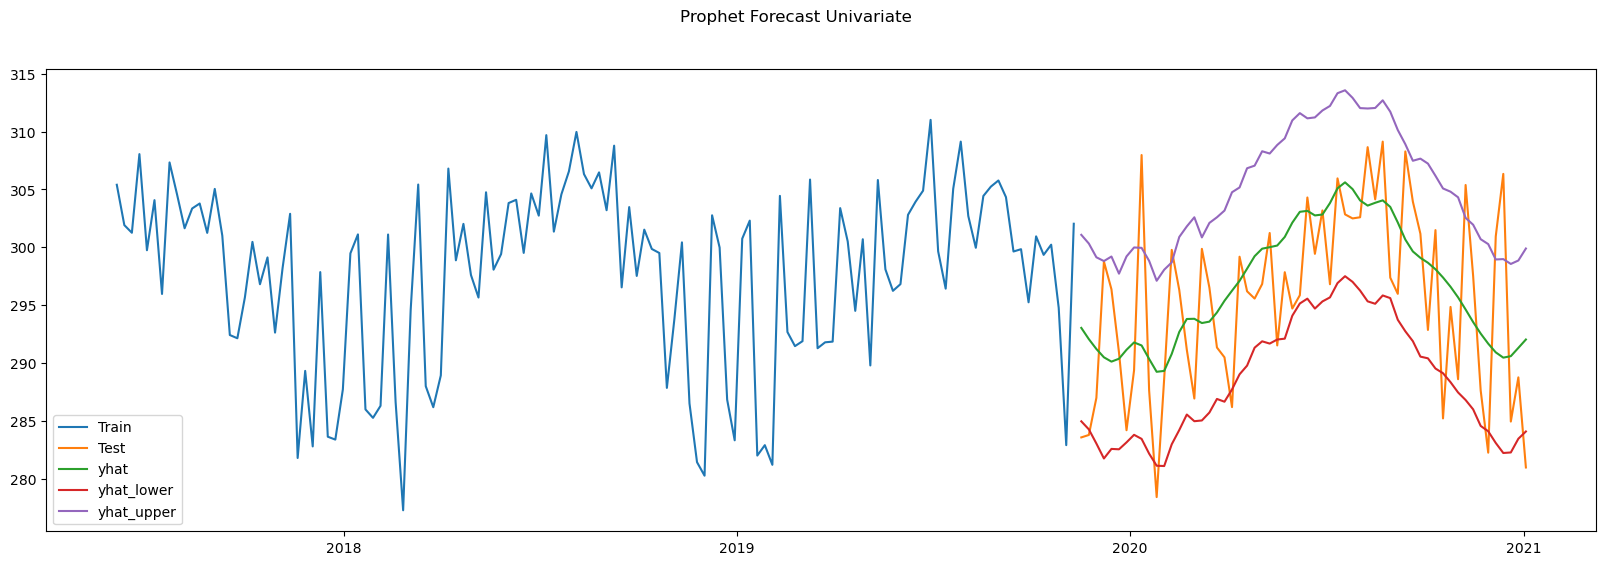

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 'yhat', 'yhat_lower', 'yhat_upper'

plt.figure(figsize=(20, 6))
plot_title = "Prophet Forecast Univariate"
plt.plot(train_plot['y'].tail(128), label='Train')
plt.plot(test_plot['y'], label='Test')
plt.plot(plot_forecast['yhat'], label='yhat')
plt.plot(plot_forecast['yhat_lower'], label='yhat_lower')
plt.plot(plot_forecast['yhat_upper'], label='yhat_upper')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(loc='best')
plt.suptitle(plot_title) # add a title
plt.savefig("{}.png".format(plot_title.replace("/", " per ").replace("**", "^"))) # save the figure
plt.show(block = False)

In [13]:
# Evaluation Metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE calculation
rmse = np.sqrt(mean_squared_error(test_plot['y'], plot_forecast['yhat'][-60:]))

# MAPE calculation
mape = mean_absolute_percentage_error(test_plot['y'], plot_forecast['yhat'][-60:])

print("Univariate Forecasting Metrics for Prophet Model")
print('RMSE: ', rmse)
print('MAPE: ', mape)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Univariate Forecasting Metrics for Prophet Model
RMSE:  6.559562549733151
MAPE:  1.843097002058321


### Effectiveness of the uncertainity level

In [15]:
# Create a boolean mask where True indicates that the true value is within the predicted interval
mask_uni_test = (test_plot['y'] >= plot_forecast['yhat_lower']) & (test_plot['y'] <= plot_forecast['yhat_upper'])

# Calculate the proportion of true values within the predicted interval
proportion_uni_test = round((mask_uni_test.sum() / len(mask_uni_test))*100,3)

print(f'Percentage of true values within the predicted interval for the test values: {proportion_uni_test}')


# Create a boolean mask where True indicates that the true value is within the predicted interval
mask_uni_all = (df['y'] >= forecast['yhat_lower']) & (df['y'] <= forecast['yhat_upper'])

# Calculate the proportion of true values within the predicted interval
proportion_uni_all = round((mask_uni_all.sum() / len(mask_uni_all))*100, 3)

print(f'Proportion of true values within the predicted interval for the whole data: {proportion_uni_all}')

Percentage of true values within the predicted interval for the test values: 78.333
Proportion of true values within the predicted interval for the whole data: 79.505


# Multivariate Time Series Forecasting

In [16]:
# Multivariate Time Series Forecasting
# 'rh', 'H2OC', 'SWDR', 'PAR' are the regressors we are going to use
prophet_multivariate = Prophet()
prophet_multivariate.add_regressor('rh')
prophet_multivariate.add_regressor('H2OC')
prophet_multivariate.add_regressor('SWDR')
prophet_multivariate.add_regressor('PAR')

prophet_multivariate.fit(train)

06:07:51 - cmdstanpy - INFO - Chain [1] start processing
06:07:51 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Making future dataframe for 60 periods
future_multi = prophet_multivariate.make_future_dataframe(periods=60, freq='W')
# Adding future values of regressors
future_multi['rh'] = df['rh']
future_multi['H2OC'] = df['H2OC']
future_multi['SWDR'] = df['SWDR']
future_multi['PAR'] = df['PAR']

forecast_multivariate = prophet_multivariate.predict(future_multi)

            ds        yhat  yhat_lower  yhat_upper
883 2020-12-06  301.019571  296.821225  304.872086
884 2020-12-13  304.545735  300.624833  308.485597
885 2020-12-20  284.610500  280.862191  288.832835
886 2020-12-27  288.704455  284.976137  292.989986
887 2021-01-03  281.709099  277.829326  285.566423


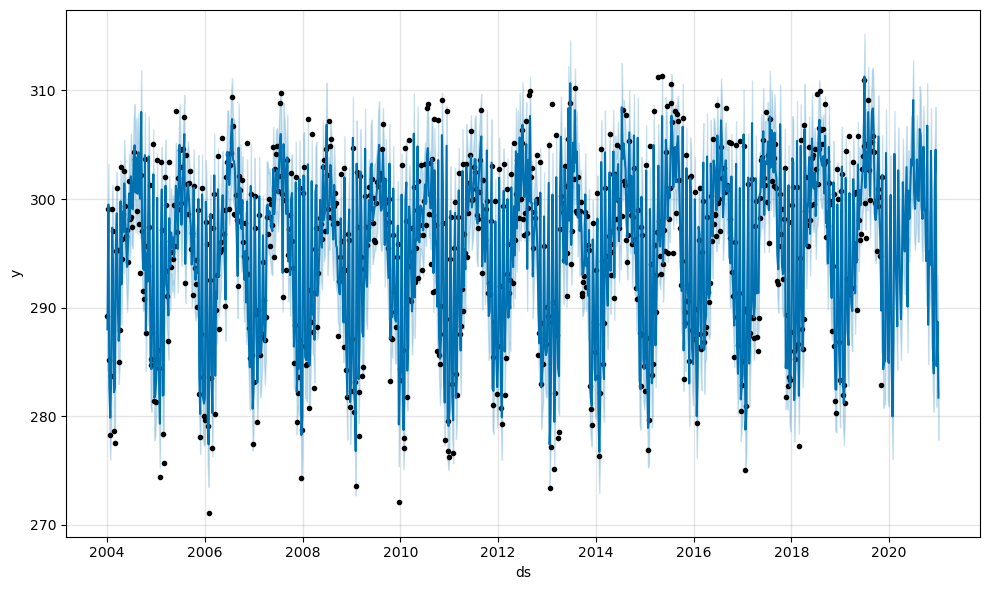

In [18]:
# Print the forecast
print(forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig2 = prophet_multivariate.plot(forecast_multivariate)

In [19]:
# Creating DFs for plotting
plot_forecast_multi = forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)
plot_forecast_multi['ds'] = pd.to_datetime(plot_forecast_multi['ds'])
plot_forecast_multi = plot_forecast_multi.set_index("ds")

display(plot_forecast_multi.head())

,yhat,yhat_lower,yhat_upper
ds,,,
2019-11-17,284.324353,280.758780,288.148212
2019-11-24,285.049245,281.108175,288.919975
2019-12-01,285.022433,281.106995,288.922512
2019-12-08,304.248760,300.317395,308.275277
2019-12-15,294.716855,290.735323,298.623476


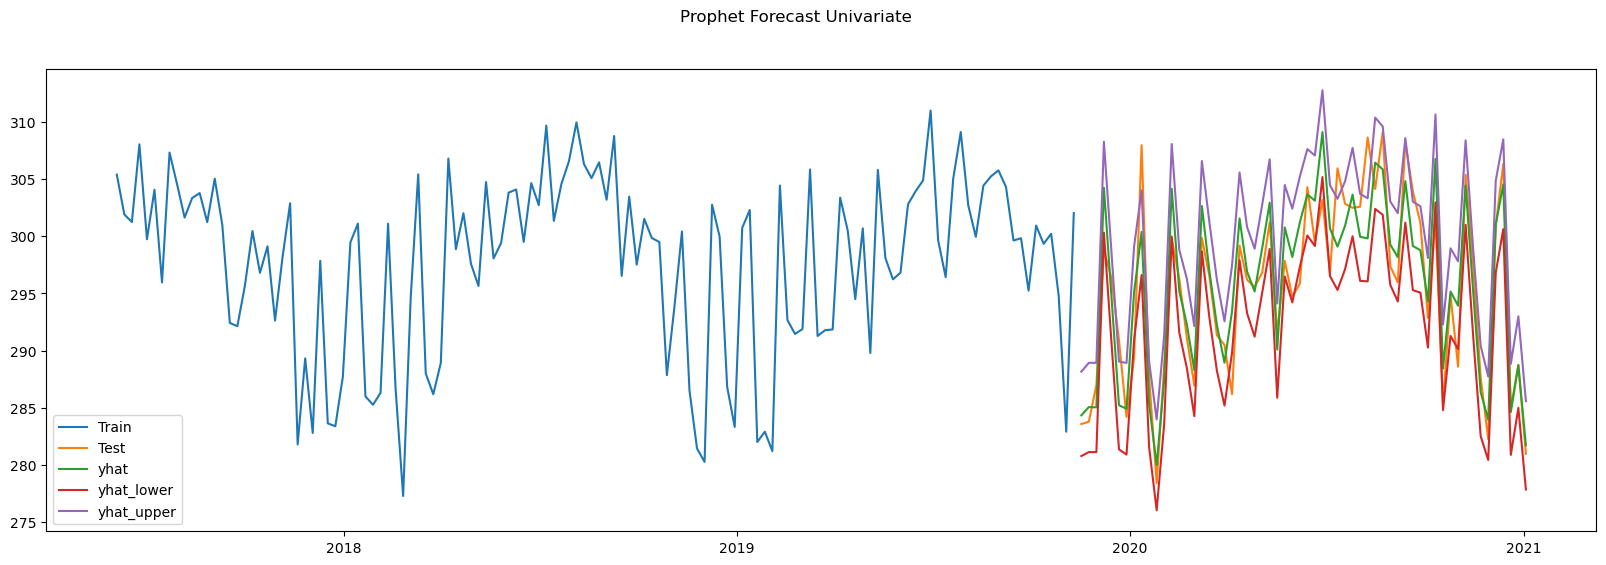

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(20, 6))
plot_title = "Prophet Forecast Univariate"
plt.plot(train_plot['y'].tail(128), label='Train')
plt.plot(test_plot['y'], label='Test')
plt.plot(plot_forecast_multi['yhat'], label='yhat')
plt.plot(plot_forecast_multi['yhat_lower'], label='yhat_lower')
plt.plot(plot_forecast_multi['yhat_upper'], label='yhat_upper')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(loc='best')
plt.suptitle(plot_title) # add a title
plt.savefig("{}.png".format(plot_title.replace("/", " per ").replace("**", "^"))) # save the figure
plt.show(block = False)

### Evaluation

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE calculation
rmse = np.sqrt(mean_squared_error(test_plot['y'], plot_forecast_multi['yhat'][-60:]))

# MAPE calculation
mape = mean_absolute_percentage_error(test_plot['y'], plot_forecast_multi['yhat'][-60:])

print("Multi-variate Forecasting Metrics for Prophet Model")
print('RMSE: ', rmse)
print('MAPE: ', mape)

Multi-variate Forecasting Metrics for Prophet Model
RMSE:  3.3512637968102577
MAPE:  0.8859436870397469


### Effectiveness of the uncertainity level

In [22]:
# Create a boolean mask where True indicates that the true value is within the predicted interval
mask_multi_test = (test_plot['y'] >= plot_forecast_multi['yhat_lower']) & (test_plot['y'] <= plot_forecast_multi['yhat_upper'])

# Calculate the proportion of true values within the predicted interval
proportion_multi_test = round((mask_multi_test.sum() / len(mask_multi_test))*100,3)

print(f'Percentage of true values within the predicted interval for the test values: {proportion_multi_test}')


# Create a boolean mask where True indicates that the true value is within the predicted interval
mask_multi_all = (df['y'] >= forecast_multivariate['yhat_lower']) & (df['y'] <= forecast_multivariate['yhat_upper'])

# Calculate the proportion of true values within the predicted interval
proportion_multi_all = round((mask_multi_all.sum() / len(mask_multi_all))*100, 3)

print(f'Proportion of true values within the predicted interval for the whole data: {proportion_multi_all}')


Percentage of true values within the predicted interval for the test values: 78.333
Proportion of true values within the predicted interval for the whole data: 79.955
